# Imports

In [1]:
!pip install ./darkflow

Processing ./darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=1161126 sha256=033f139bec99d0cefad5750281b68a40e21b3077e93e4bccc7829656270fd0eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-3mijpyya/wheels/e8/f4/64/a2f3750958277632c150f4481475955c4d26ad211048b82915
Successfully built darkflow
  Attempting uninstall: darkflow
    Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import glob as glob

# Environment setup

In [3]:
%matplotlib inline
import sys
sys.path.append('./darkflow')

## Helper code

In [4]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

# Darkflow

## Model preparation 

In [5]:
# sys.path.append('./darkflow/') # ~/darkflow
# traffic env

from darkflow.net.build import TFNet
import cv2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

MODEL_NAME = 'yolo_v2'
MODEL_PATH = os.path.join('model', MODEL_NAME)

options = {'model': os.path.join(MODEL_PATH, '{}.cfg'.format(MODEL_NAME)),
           'labels': os.path.join(MODEL_PATH, 'labels.txt'),
           'backup': MODEL_PATH,
           'load' : 50500,
           'threshold': 0.5,
           'gpu' : 1.0}

tfnet = TFNet(options)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.









Instructions for updating:
non-resource variables are not supported in the long term
Parsing model/yolo_v2/yolo_v2.cfg
Loading None ...
Finished in 0.00010395050048828125s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  |

## Helper code

In [6]:
def plot_rectangle(bbox, ax, class_name, edgecolor, confidence=None):
    xmin = bbox[0]
    ymin = bbox[1]
    xmax = bbox[2]
    ymax = bbox[3]
    left = xmin
    right = xmax
    top = ymin
    bot = ymax
    ax.add_patch(
        plt.Rectangle((left, top),
                      right-left,
                      bot-top, fill=False,
                      edgecolor=edgecolor, linewidth=3.5)
        )
    label = '{:s}'.format(class_name)
    label_pos_y = top-10
    if confidence:
        label += ' {0:.2f}'.format(confidence)
        label_pos_y = bot+20
    ax.text(left, label_pos_y,label,
            bbox=dict(facecolor=edgecolor, alpha=0.5),
            fontsize=14, color='white')

In [7]:
def get_label_id(label_name):
    for category in categories:
        if category['name'] == label_name:
            return category['id']

## Detection

0.9206368923187256
[{'label': 'prohibitory', 'confidence': 0.6720932, 'topleft': {'x': 375, 'y': 411}, 'bottomright': {'x': 393, 'y': 432}}, {'label': 'danger', 'confidence': 0.69546837, 'topleft': {'x': 694, 'y': 294}, 'bottomright': {'x': 745, 'y': 334}}]


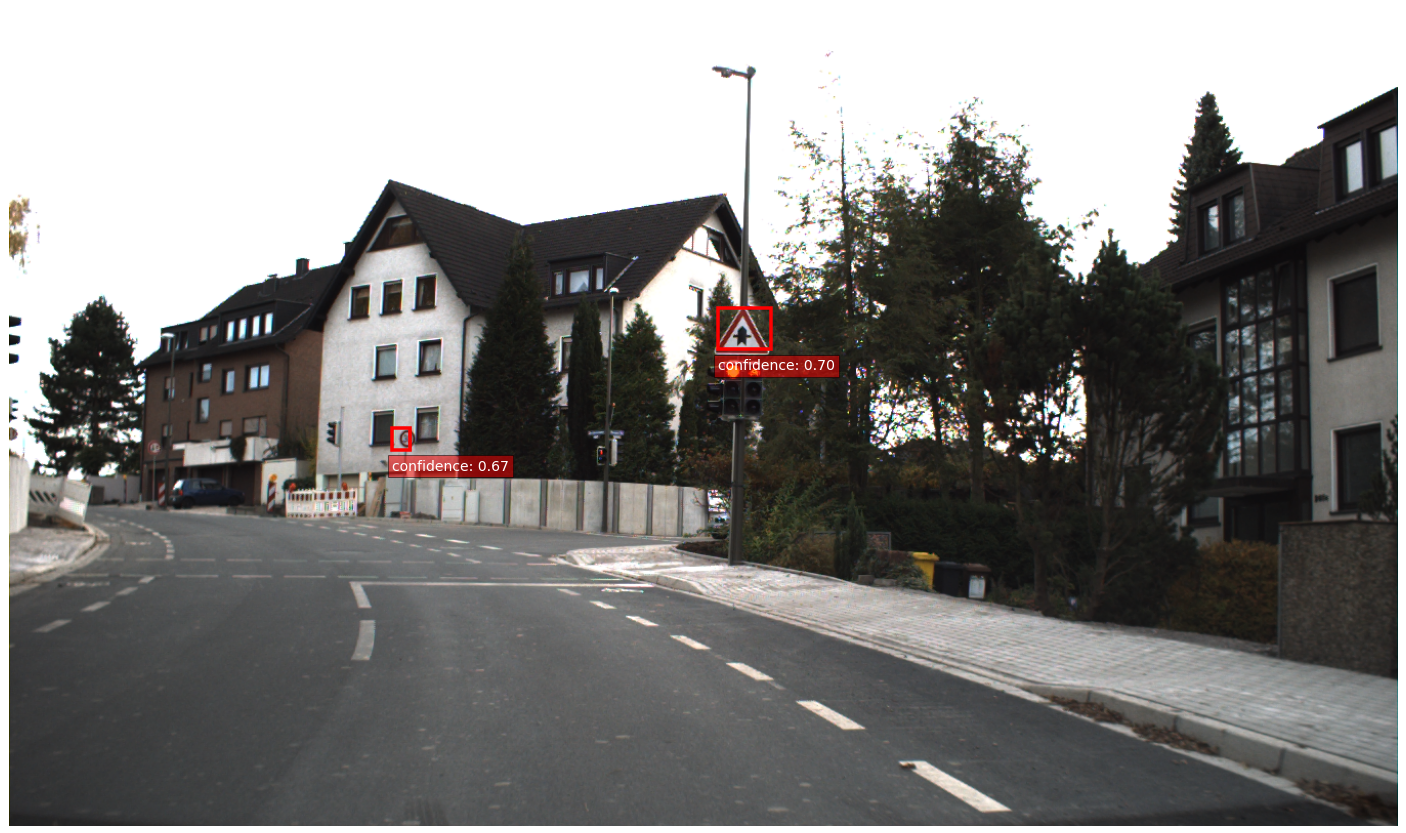

In [8]:
min_score_thresh = 0.5
# for image_path in TEST_IMAGE_PATHS:

fig, ax = plt.subplots(figsize=(20, 20))
image_path = './test_imgs/00500.png'
# image_path = '00507.png'
# image_path = '00599.png'
image_path = './test_imgs/00165.png'
image = Image.open(image_path)
image_name = os.path.basename(image_path)
width, height = image.size
ax.imshow(image)

# image_np = load_image_into_numpy_array(image)
import time
start = time.time()
image_np = np.array(image)
image_np = image_np[:,:,::-1] # rgb -> bgr
pred_results = tfnet.return_predict(image_np)
print(time.time() - start)
print(pred_results)
for idx, det in enumerate(pred_results):
    score = det['confidence']
    if score > min_score_thresh:
        bbox = det['topleft']['x'], det['topleft']['y'], det['bottomright']['x'], det['bottomright']['y']
#         label = get_label_id(det['label'])
        
        plot_rectangle(bbox,ax,'confidence:','red', score)
plt.draw()
fig.tight_layout()
plt.axis('off')
plt.show()

In [9]:


print(image_np.shape)
print()
im = np.array(image)
img = im[det['topleft']['y']-10:det['bottomright']['y']+10,
      det['topleft']['x']-10:det['bottomright']['x']+10]

(800, 1360, 3)



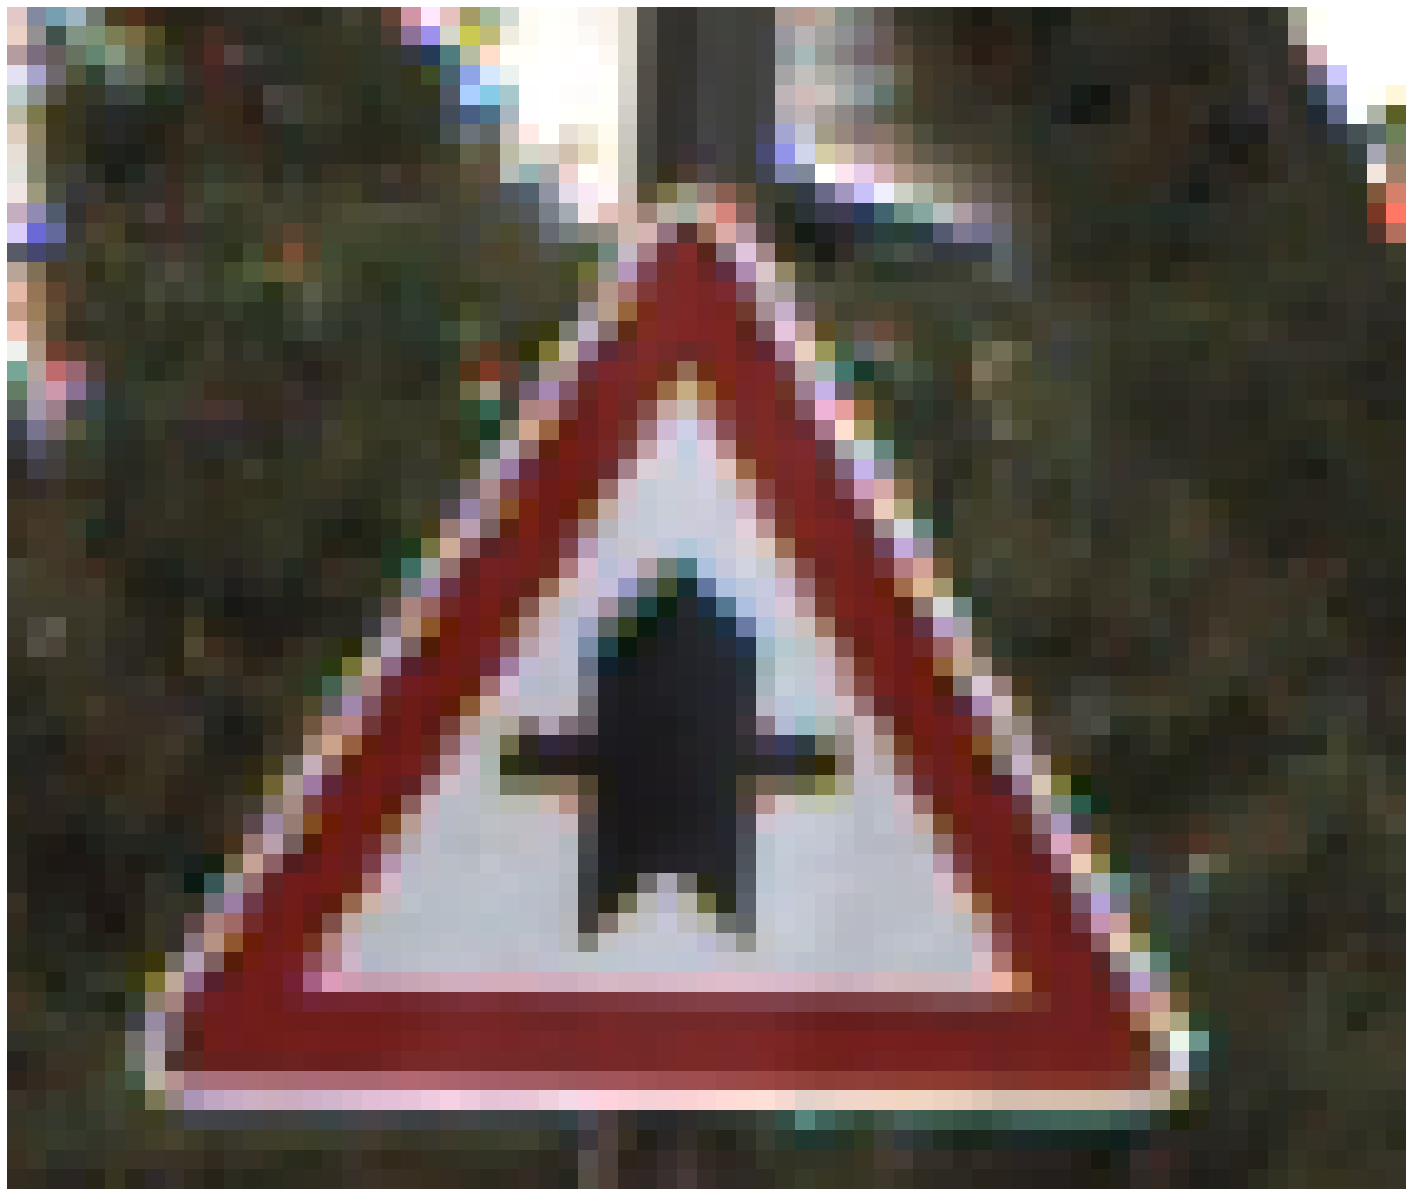

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img)

plt.draw()
fig.tight_layout()
plt.axis('off')
plt.show()

In [11]:
from tensorflow import keras
model = keras.models.load_model('./trainedclassification_model.h5')

OSError: SavedModel file does not exist at: ./trainedclassification_model.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
min_score_thresh = 0.5

fig, ax = plt.subplots(figsize=(20, 20))
image_path = './test_imgs/00165.png'
image = Image.open(image_path)
image_name = os.path.basename(image_path)
width, height = image.size
ax.imshow(image)

image_np = np.array(image)
image_np = image_np[:,:,::-1] # rgb -> bgr
pred_results = tfnet.return_predict(image_np)

for idx, det in enumerate(pred_results):
    score = det['confidence']
    if score > min_score_thresh:
        bbox = det['topleft']['x'], det['topleft']['y'], det['bottomright']['x'], det['bottomright']['y']       
        plot_rectangle(bbox,ax,'confidence:','red', score)
plt.draw()
fig.tight_layout()
plt.axis('off')
plt.show()